In [2]:
%matplotlib inline

# scientific packages
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import relativedelta
sns.set();

In [3]:
df = pd.read_csv('C:\\Users\\krish\\Downloads\\takehome challenge dataset\\employee_retention_data.csv')
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021,7,customer_service,28,89000,2014-03-24,2015-10-30
1,825355,7,marketing,20,183000,2013-04-29,2014-04-04
2,927315,4,marketing,14,101000,2014-10-13,NaN
3,662910,7,customer_service,20,115000,2012-05-14,2013-06-07
4,256971,2,data_science,23,276000,2011-10-17,2014-08-22


In [4]:
df['salary'].describe()

count     24702.000000
mean     138183.345478
std       76058.184573
min       17000.000000
25%       79000.000000
50%      123000.000000
75%      187000.000000
max      408000.000000
Name: salary, dtype: float64

In [5]:
df = df[df['seniority'] < 50 ]
df['seniority'].unique()

array([28, 20, 14, 23, 21,  4,  7, 13, 17,  1, 10,  6, 19, 15, 26, 27,  5,
       18, 16, 25,  9,  2, 29,  3,  8, 22, 24, 12, 11], dtype=int64)

In [6]:
df['company_id'].unique()

array([ 7,  4,  2,  9,  1,  6, 10,  5,  3,  8, 11, 12], dtype=int64)

In [7]:
df['dept'].unique()

array(['customer_service', 'marketing', 'data_science', 'engineer',
       'sales', 'design'], dtype=object)

In [8]:
# nbr of null values in each column
for col in df:
    print (col, pd.isnull(df[col]).sum())

employee_id 0
company_id 0
dept 0
seniority 0
salary 0
join_date 0
quit_date 11192


In [9]:
df.groupby("company_id").agg({"employee_id": pd.Series.nunique})

,employee_id
company_id,
1,8485
2,4222
3,2749
4,2062
5,1755
6,1291
7,1224
8,1047
9,961


In [10]:
df.groupby("dept").agg({"employee_id": pd.Series.nunique})

,employee_id
dept,
customer_service,9180
data_science,3190
design,1380
engineer,4612
marketing,3166
sales,3172


In [11]:
df['churn_y'] = np.where(df['quit_date'].isnull(), '0.0', '1.0')
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn_y
0,13021,7,customer_service,28,89000,2014-03-24,2015-10-30,1.0
1,825355,7,marketing,20,183000,2013-04-29,2014-04-04,1.0
2,927315,4,marketing,14,101000,2014-10-13,NaN,0.0
3,662910,7,customer_service,20,115000,2012-05-14,2013-06-07,1.0
4,256971,2,data_science,23,276000,2011-10-17,2014-08-22,1.0


In [12]:
df['quit_date'] = df['quit_date'].fillna('2015-12-13')
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn_y
0,13021,7,customer_service,28,89000,2014-03-24,2015-10-30,1.0
1,825355,7,marketing,20,183000,2013-04-29,2014-04-04,1.0
2,927315,4,marketing,14,101000,2014-10-13,2015-12-13,0.0
3,662910,7,customer_service,20,115000,2012-05-14,2013-06-07,1.0
4,256971,2,data_science,23,276000,2011-10-17,2014-08-22,1.0


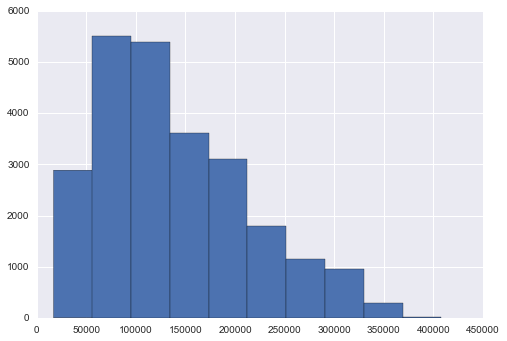

In [13]:
df.salary.hist()

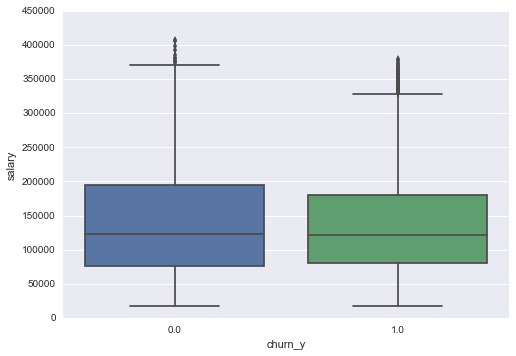

In [14]:
sns.boxplot(df.churn_y,df.salary)
# churn rate is less as the salary is high

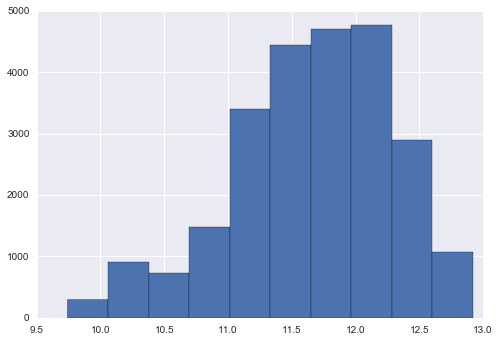

In [15]:
df['log_salary'] = np.log(df['salary'])
#df.head()
df.log_salary.hist()


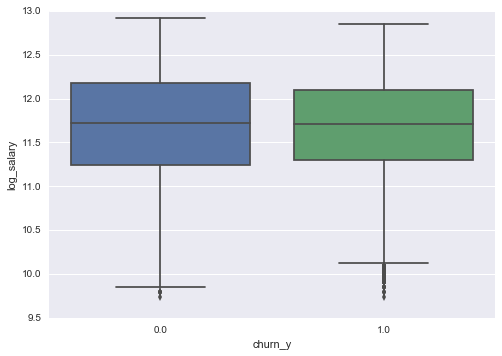

In [16]:
sns.boxplot(df.churn_y,df.log_salary)

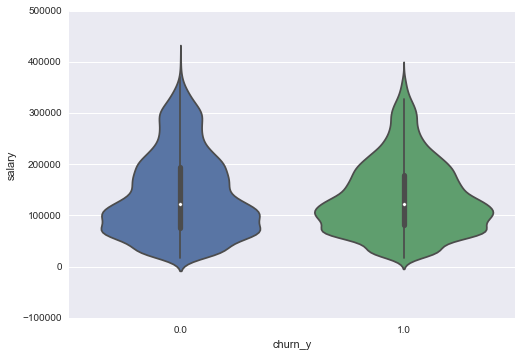

In [17]:
#fig = plt.subplots(figsize=(14,8))
#sns.set_context('poster')
#sns.violinplot(df.churn_y,df.salary,split=True, inner="stick", )
#plt.tight_layout()
sns.violinplot(df.churn_y,df.salary)

# churn rate is less as the salary is high 

# derived

In [18]:
df['join_date'] = pd.to_datetime(df['join_date'], format='%Y-%m-%d')
df['quit_date'] = pd.to_datetime(df['quit_date'], format='%Y-%m-%d')

df['employment_age_months'] = (df['quit_date']-df['join_date']).astype('timedelta64[M]') + 1

def months_away_closest_anniversary (x):
    if (np.isnan(x)):
        return 'NaN'
    elif (x %12 > 6):
        return (x %12) - 12
    else:
        return (x %12)
    
df['months_away_anniversary'] = df['employment_age_months'].apply(months_away_closest_anniversary)

df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn_y,log_salary,employment_age_months,months_away_anniversary
0,13021,7,customer_service,28,89000,2014-03-24,2015-10-30,1.0,11.396392,20,-4
1,825355,7,marketing,20,183000,2013-04-29,2014-04-04,1.0,12.117241,12,0
2,927315,4,marketing,14,101000,2014-10-13,2015-12-13,0.0,11.522876,14,2
3,662910,7,customer_service,20,115000,2012-05-14,2013-06-07,1.0,11.652687,13,1
4,256971,2,data_science,23,276000,2011-10-17,2014-08-22,1.0,12.528156,35,-1


In [19]:
#df['quit_month'] = df['quit_date'].dt.month
def calc_quit_month (row):
    if(row['churn_y'] == '0.0'):
        return 0
    else:
        return np.datetime64(row['quit_date']).astype(object).month
    
df['quit_month'] = df.apply(calc_quit_month, axis=1)
df.head()
#df.dtypes

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn_y,log_salary,employment_age_months,months_away_anniversary,quit_month
0,13021,7,customer_service,28,89000,2014-03-24,2015-10-30,1.0,11.396392,20,-4,10
1,825355,7,marketing,20,183000,2013-04-29,2014-04-04,1.0,12.117241,12,0,4
2,927315,4,marketing,14,101000,2014-10-13,2015-12-13,0.0,11.522876,14,2,0
3,662910,7,customer_service,20,115000,2012-05-14,2013-06-07,1.0,11.652687,13,1,6
4,256971,2,data_science,23,276000,2011-10-17,2014-08-22,1.0,12.528156,35,-1,8


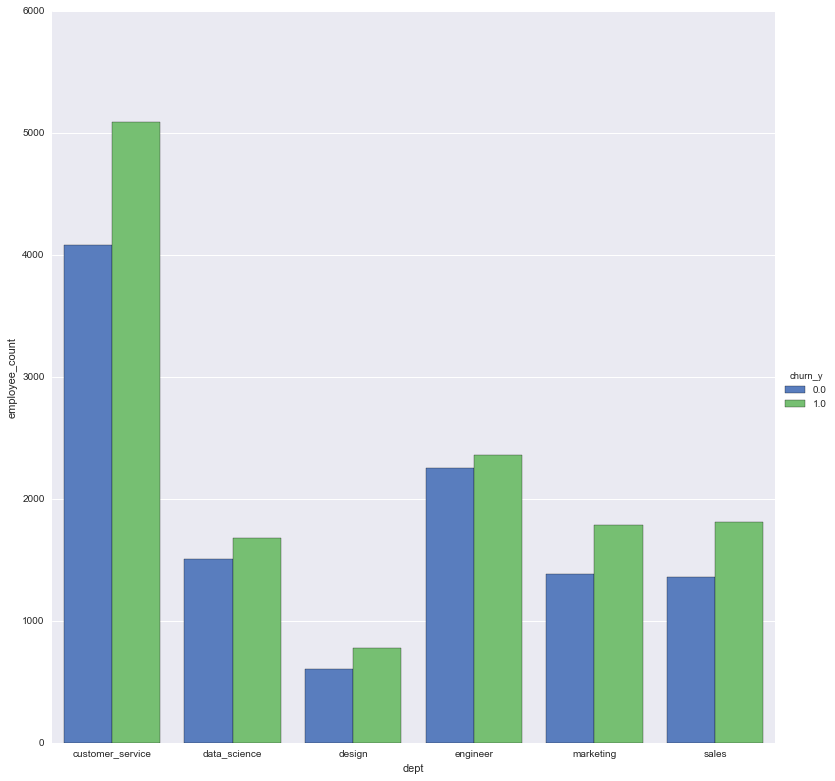

In [20]:
df_fp = df.groupby(['dept','churn_y']).agg({"employee_id": pd.Series.nunique}).reset_index()
g = sns.factorplot(x="dept", y="employee_id", data=df_fp, 
                   hue="churn_y", 
                   size=11, kind="bar", palette="muted")
g.set_ylabels("employee_count")

# high churn rate at customer service dept

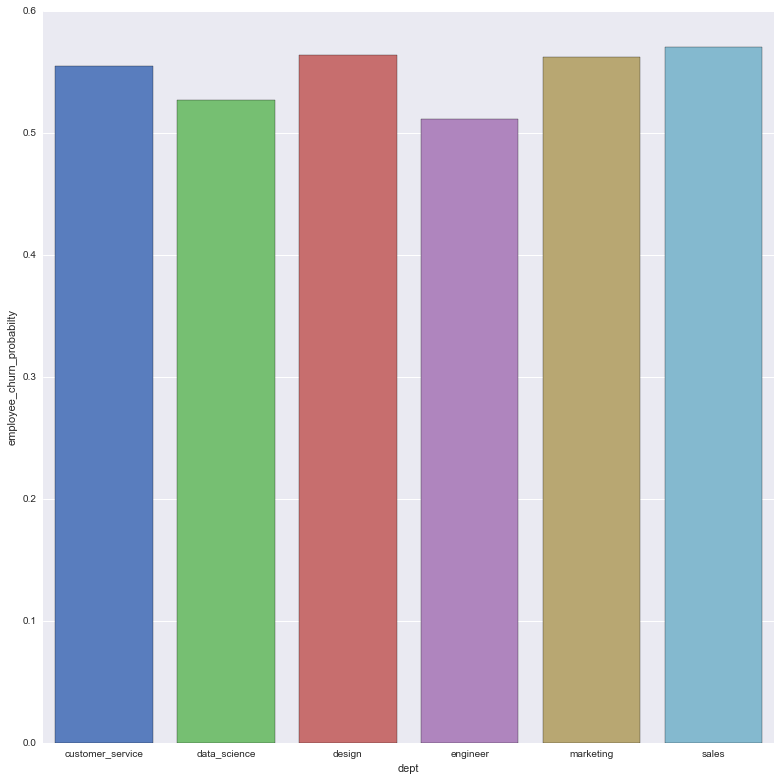

In [21]:
df_fp = df.groupby(['dept','churn_y']).agg({"employee_id": pd.Series.nunique})

df_fp_sum = df_fp.groupby(level=0).sum().reset_index()
df_fp_sum.rename(columns={'employee_id': 'tot_employee_count'}, inplace=True)

df_fp = df_fp.reset_index()
df_fp.rename(columns={'employee_id': 'churn_employee_count'}, inplace=True)
df_fp = df_fp[(df_fp['churn_y'] == '1.0') ]
df_fp = pd.merge(df_fp[['dept','churn_employee_count']], df_fp_sum, on='dept')
df_fp['churn_prob'] = df_fp.churn_employee_count/df_fp.tot_employee_count
g = sns.factorplot(x="dept", y="churn_prob", data=df_fp, 
                    size=11, kind="bar", palette="muted")
g.set_ylabels("employee_churn_probabilty")
#df_fp

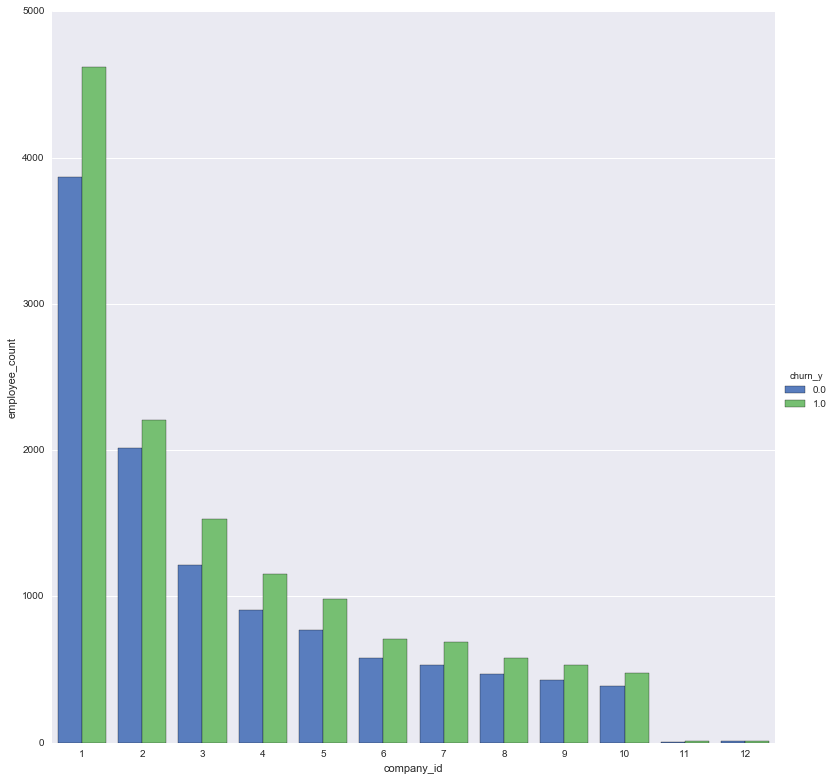

In [22]:
df_fp = df.groupby(['company_id','churn_y']).agg({"employee_id": pd.Series.nunique}).reset_index()
g = sns.factorplot(x="company_id", y="employee_id", data=df_fp, 
                   hue="churn_y", 
                   size=11, kind="bar", palette="muted")
g.set_ylabels("employee_count")


# company 1 has more churn - may be due to high employee count

,company_id,churn_employee_count,tot_employee_count,churn_prob
0,1,4620,8485,0.544490
1,2,2206,4222,0.522501
2,3,1531,2749,0.556930
3,4,1153,2062,0.559166
4,5,983,1755,0.560114
5,6,712,1291,0.551510
6,7,692,1224,0.565359
7,8,579,1047,0.553009
8,9,529,961,0.550468
9,10,479,864,0.554398


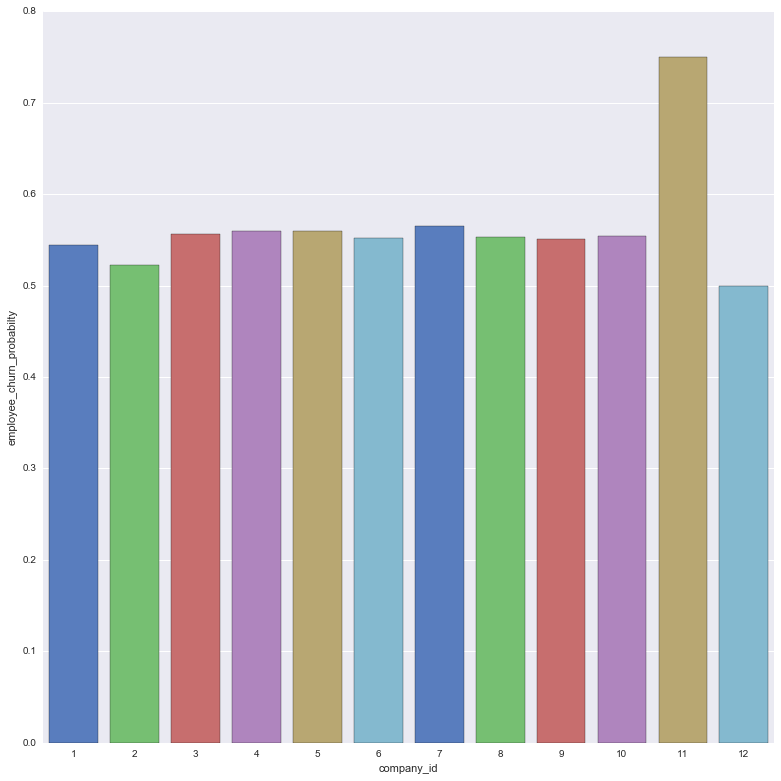

In [23]:
df_fp = df.groupby(['company_id','churn_y']).agg({"employee_id": pd.Series.nunique})

df_fp_sum = df_fp.groupby(level=0).sum().reset_index()
df_fp_sum.rename(columns={'employee_id': 'tot_employee_count'}, inplace=True)

df_fp = df_fp.reset_index()
df_fp.rename(columns={'employee_id': 'churn_employee_count'}, inplace=True)
df_fp = df_fp[(df_fp['churn_y'] == '1.0') ]
df_fp = pd.merge(df_fp[['company_id','churn_employee_count']], df_fp_sum, on='company_id')
df_fp['churn_prob'] = df_fp.churn_employee_count/df_fp.tot_employee_count
g = sns.factorplot(x="company_id", y="churn_prob", data=df_fp, 
                    size=11, kind="bar", palette="muted")
g.set_ylabels("employee_churn_probabilty")
df_fp

# 75 % in company 11 churned 

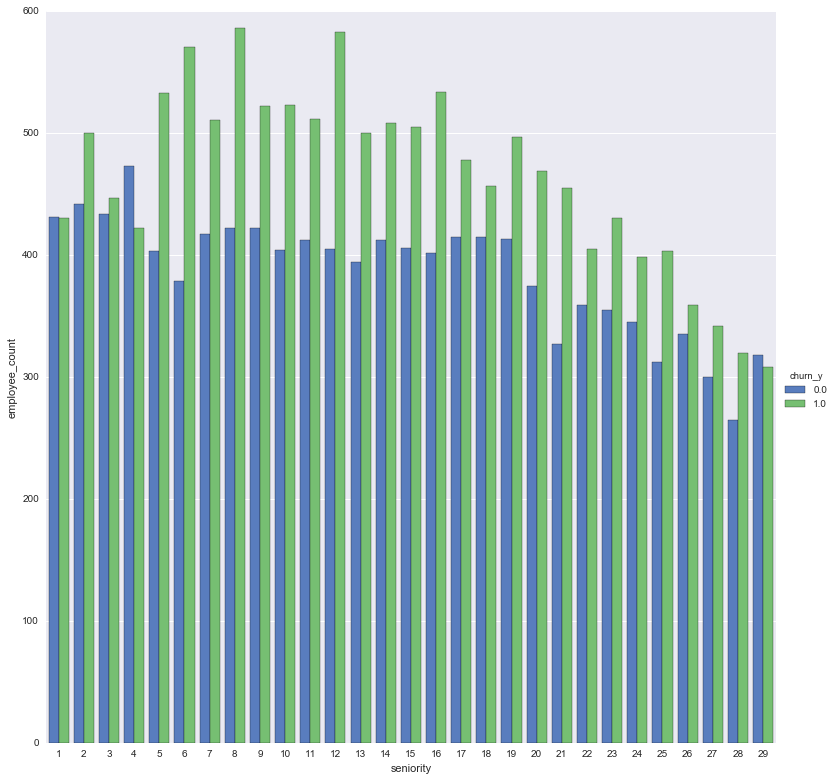

In [24]:
df_fp = df.groupby(['seniority','churn_y']).agg({"employee_id": pd.Series.nunique}).reset_index()
g = sns.factorplot(x="seniority", y="employee_id", data=df_fp, 
                   hue="churn_y", 
                   size=11, kind="bar", palette="muted")
g.set_ylabels("employee_count")


# except 4 & 29 years all years are churning 

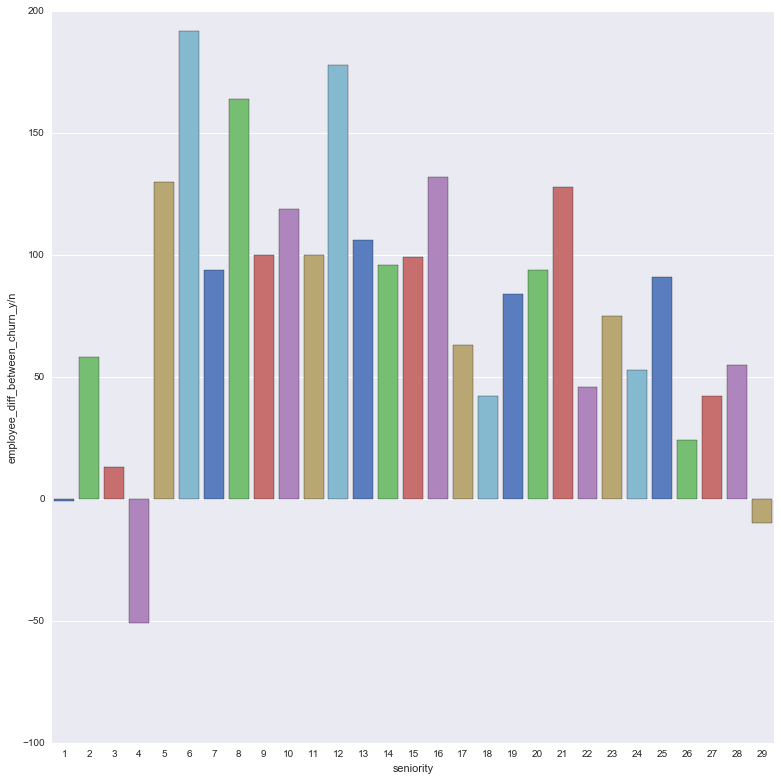

In [25]:
df_fp = df.groupby(['seniority','churn_y']).agg({"employee_id": pd.Series.nunique})
df_fp['dif'] = df_fp.groupby(level='seniority').diff()
df_fp = df_fp.reset_index()
df_fp = df_fp[(df_fp['churn_y'] == '1.0') & (df_fp['seniority'] < 50) ]
df_fp = df_fp[['seniority','dif']]
g = sns.factorplot(x="seniority", y="dif", data=df_fp, 
                   size=11, kind="bar", palette="muted")
g.set_ylabels("employee_diff_between_churn_y/n")
#df_fp


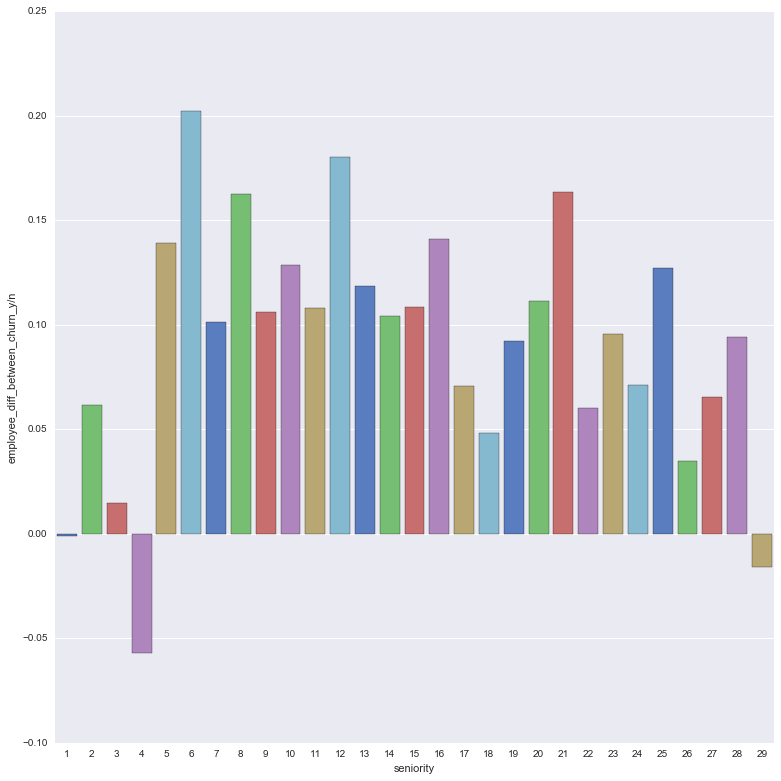

In [26]:
df_fp = df.groupby(['seniority','churn_y']).agg({"employee_id": pd.Series.nunique})
df_fp['dif'] = (df_fp.groupby(level='seniority').diff())/(df_fp.groupby(level='seniority').sum())
df_fp = df_fp.reset_index()
df_fp = df_fp[(df_fp['churn_y'] == '1.0') & (df_fp['seniority'] < 50) ]
df_fp = df_fp[['seniority','dif']]
g = sns.factorplot(x="seniority", y="dif", data=df_fp, 
                   size=11, kind="bar", palette="muted")
g.set_ylabels("employee_diff_between_churn_y/n")
#df_fp


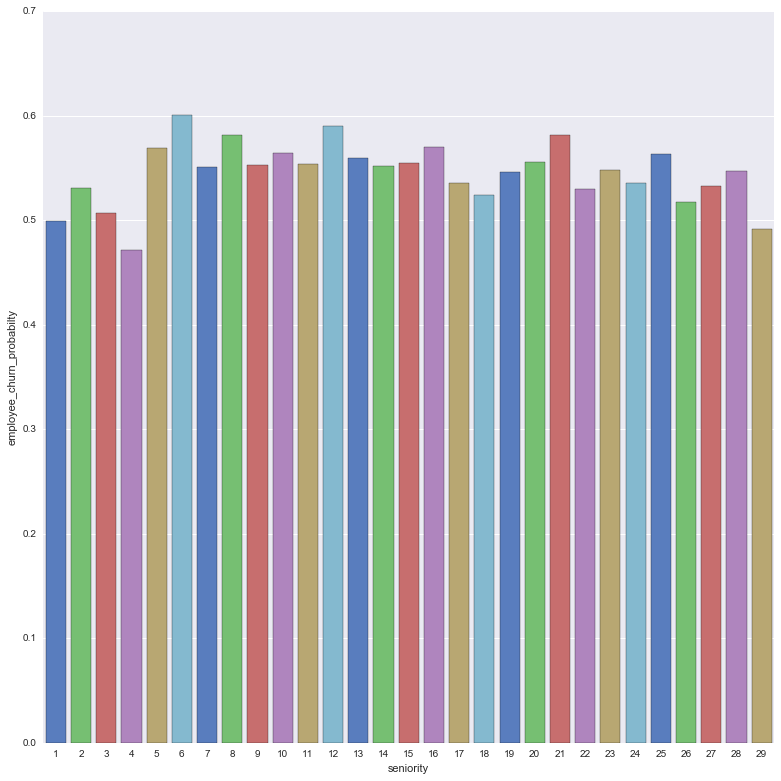

In [27]:
df_fp = df.groupby(['seniority','churn_y']).agg({"employee_id": pd.Series.nunique})

df_fp_sum = df_fp.groupby(level=0).sum().reset_index()
df_fp_sum.rename(columns={'employee_id': 'tot_employee_count'}, inplace=True)

df_fp = df_fp.reset_index()
df_fp.rename(columns={'employee_id': 'churn_employee_count'}, inplace=True)
df_fp = df_fp[(df_fp['churn_y'] == '1.0') & (df_fp['seniority'] < 50) ]
df_fp = pd.merge(df_fp[['seniority','churn_employee_count']], df_fp_sum, on='seniority')
df_fp['churn_prob'] = df_fp.churn_employee_count/df_fp.tot_employee_count
g = sns.factorplot(x="seniority", y="churn_prob", data=df_fp, 
                    size=11, kind="bar", palette="muted")
g.set_ylabels("employee_churn_probabilty")
#df_fp


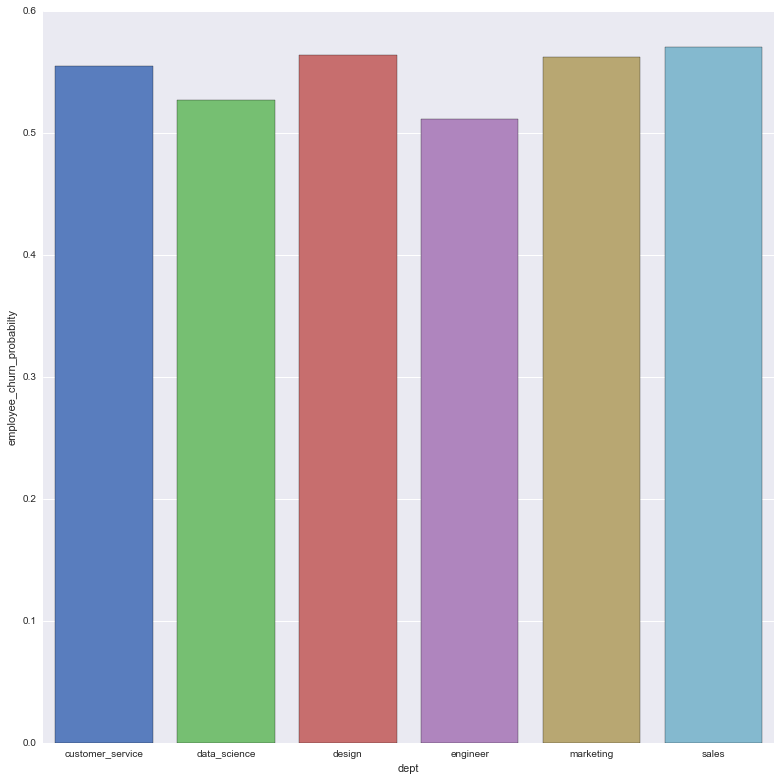

In [28]:
df_fp = df.groupby(['dept','churn_y']).agg({"employee_id": pd.Series.nunique})

df_fp_sum = df_fp.groupby(level=0).sum().reset_index()
df_fp_sum.rename(columns={'employee_id': 'tot_employee_count'}, inplace=True)

df_fp = df_fp.reset_index()
df_fp.rename(columns={'employee_id': 'churn_employee_count'}, inplace=True)
df_fp = df_fp[(df_fp['churn_y'] == '1.0') ]
df_fp = pd.merge(df_fp[['dept','churn_employee_count']], df_fp_sum, on='dept')
df_fp['churn_prob'] = df_fp.churn_employee_count/df_fp.tot_employee_count
g = sns.factorplot(x="dept", y="churn_prob", data=df_fp, 
                    size=11, kind="bar", palette="muted")
g.set_ylabels("employee_churn_probabilty")
#df_fp

In [29]:
df_fp = df.groupby(['log_salary','churn_y']).agg({"employee_id": pd.Series.nunique})

df_fp_sum = df_fp.groupby(level=0).sum().reset_index()
df_fp_sum.rename(columns={'employee_id': 'tot_employee_count'}, inplace=True)

df_fp = df_fp.reset_index()
df_fp.rename(columns={'employee_id': 'churn_employee_count'}, inplace=True)
df_fp = df_fp[(df_fp['churn_y'] == '1.0') ]
df_fp = pd.merge(df_fp[['log_salary','churn_employee_count']], df_fp_sum, on='log_salary')
df_fp['churn_prob'] = df_fp.churn_employee_count/df_fp.tot_employee_count
df_fp.head()
# g = sns.factorplot(x="log_salary", y="churn_prob", data=df_fp, 
#                     size=11, kind="bar", palette="muted")
# g.set_ylabels("employee_churn_probabilty")
 

,log_salary,churn_employee_count,tot_employee_count,churn_prob
0,9.740969,1,2,0.500000
1,9.798127,3,9,0.333333
2,9.852194,6,12,0.500000
3,9.903488,13,21,0.619048
4,9.952278,20,49,0.408163


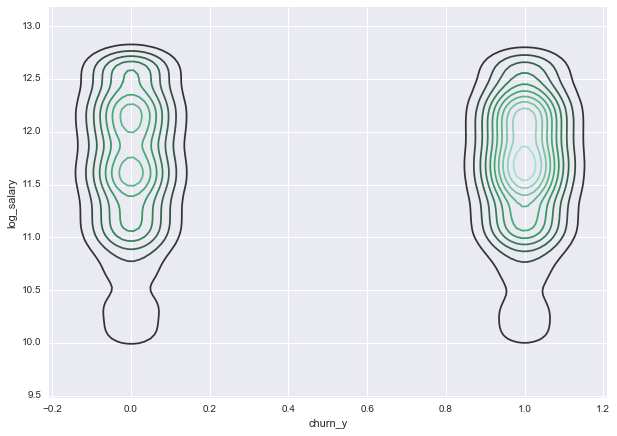

In [30]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.churn_y, df.log_salary, ax=ax)

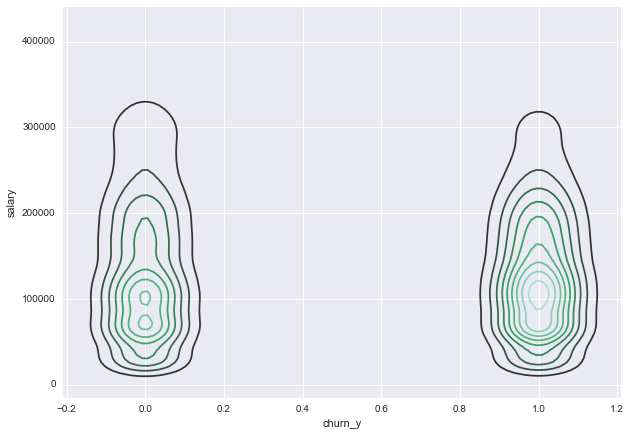

In [31]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.churn_y, df.salary, ax=ax)

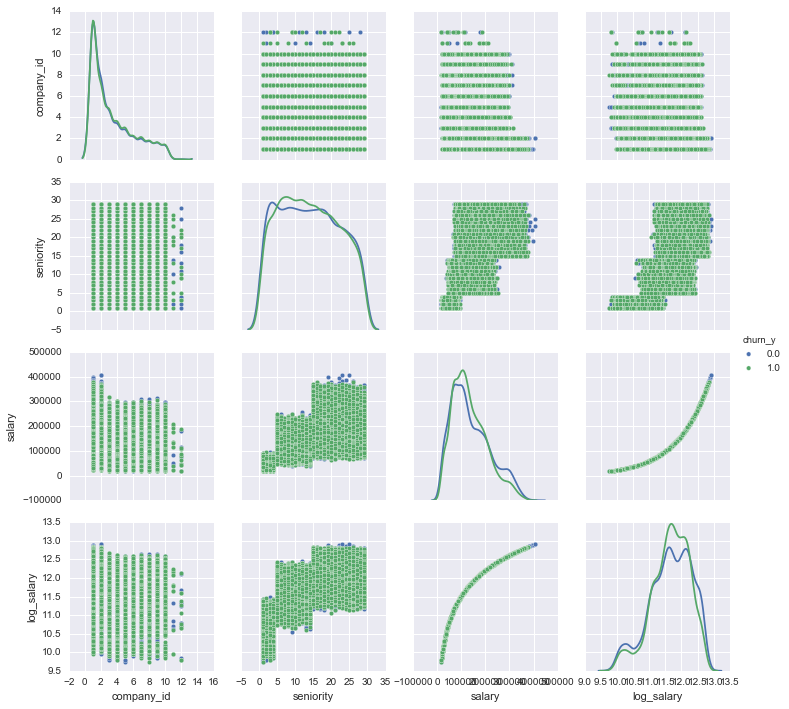

In [32]:
sns.pairplot(df, hue="churn_y", vars=['company_id', 'seniority', 'salary','log_salary'], diag_kind='kde')

# dummy variables

In [33]:
df.columns

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date', 'churn_y', 'log_salary', 'employment_age_months',
       'months_away_anniversary', 'quit_month'],
      dtype='object')

In [34]:
features = [#'salary',
            'log_salary',
            'employment_age_months'
           ]

# features = [
#             'log_salary'
#            ]

categoricals = ['dept',
                'seniority',
                'company_id',
                'months_away_anniversary'
#                'quit_month'
               ]

target = 'churn_y'

In [35]:

dummy_categoricals = []
for categorical in categoricals:
    print (categorical, len(df[categorical].unique()))
    # Avoid the dummy variable trap!
    drop_var = sorted(df[categorical].unique())[-1]
    temp_df = pd.get_dummies(df[categorical], prefix=categorical)
    df = pd.concat([df, temp_df], axis=1)
    temp_df.drop('_'.join([categorical, str(drop_var)]), axis=1, inplace=True)
    dummy_categoricals += temp_df.columns.tolist()

dept 6
seniority 29
company_id 12
months_away_anniversary 12


In [36]:
len(dummy_categoricals)
dummy_categoricals[:10]

['dept_customer_service',
 'dept_data_science',
 'dept_design',
 'dept_engineer',
 'dept_marketing',
 'seniority_1',
 'seniority_2',
 'seniority_3',
 'seniority_4',
 'seniority_5']

# Model Building

In [37]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [38]:
train, test = train_test_split(df, test_size=0.4)

In [39]:
rf = RandomForestClassifier(n_estimators=50, oob_score=True)

In [40]:
rf.fit(train[features + dummy_categoricals], train[target])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [41]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

In [42]:
predicted = rf.predict(test[features + dummy_categoricals])
r2_score(test[target], predicted)

-0.22262040670385441

In [43]:
explained_variance_score(test[target], predicted)

-0.21735096734352544

In [44]:
mean_squared_error(test[target], predicted)

0.3029352226720648

In [45]:
rf_importances = pd.DataFrame({'name':train[features + dummy_categoricals].columns,
                               'importance':rf.feature_importances_
                              }).sort_values(by='importance', 
                                              ascending=False).reset_index(drop=True)
rf_importances.head(20)

,importance,name
0,0.269878,employment_age_months
1,0.234674,log_salary
2,0.022000,months_away_anniversary_0.0
3,0.020114,company_id_1
4,0.019912,months_away_anniversary_1.0
5,0.017973,dept_customer_service
6,0.015504,company_id_2
7,0.014824,dept_marketing
8,0.013952,company_id_3
9,0.013423,dept_engineer


In [46]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(test[target], predicted, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.68      0.63      0.65      4474
    class 1       0.71      0.76      0.73      5406

avg / total       0.70      0.70      0.70      9880



In [47]:
from sklearn.linear_model import LogisticRegression
X = train[features + dummy_categoricals]
y = train[target]

C = 0.1
lr = LogisticRegression(C=C, penalty='l1').fit(X,y)
predicted = lr.predict(test[features + dummy_categoricals])
print(classification_report(test[target], predicted, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.70      0.61      0.65      4474
    class 1       0.71      0.79      0.75      5406

avg / total       0.71      0.71      0.70      9880



In [48]:
C = 0.1
lr = LogisticRegression(C=C, penalty='l2').fit(X,y)
predicted = lr.predict(test[features + dummy_categoricals])
print(classification_report(test[target], predicted, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.71      0.60      0.65      4474
    class 1       0.71      0.79      0.75      5406

avg / total       0.71      0.71      0.70      9880



In [49]:
from sklearn import svm
X = train[features + dummy_categoricals]
y = train[target]

C = 1.0

svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

In [50]:
predicted = svc.predict(test[features + dummy_categoricals])
print(classification_report(test[target], predicted, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.68      0.59      0.63      4474
    class 1       0.69      0.77      0.73      5406

avg / total       0.69      0.69      0.68      9880



In [51]:
predicted = rbf_svc.predict(test[features + dummy_categoricals])
print(classification_report(test[target], predicted, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.72      0.60      0.66      4474
    class 1       0.71      0.81      0.76      5406

avg / total       0.72      0.72      0.71      9880



In [52]:
predicted = poly_svc.predict(test[features + dummy_categoricals])
print(classification_report(test[target], predicted, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.78      0.59      0.67      4474
    class 1       0.72      0.86      0.78      5406

avg / total       0.75      0.74      0.73      9880



In [53]:
predicted = lin_svc.predict(test[features + dummy_categoricals])
print(classification_report(test[target], predicted, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.90      0.37      0.53      4474
    class 1       0.65      0.97      0.78      5406

avg / total       0.76      0.70      0.66      9880



In [54]:
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X = train[features + dummy_categoricals]
y = train[target]

Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

NameError: name 'time' is not defined

In [1]:
from sklearn import svm, grid_search, datasets
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [ ]:
predicted = cross_validation.cross_val_predict(clf, iris.data,iris.target, cv=10)
metrics.accuracy_score(iris.target, predicted) 